# Diabetes Disease Detection with Logistic Regression, Neural Networks, XG-Boost

---

## THE PROBLEM STATEMENT AND BUSINESS CASE

- This dataset(diabetes.csv) is used to predict whether or not a patient has diabetes, based on given features/diagnostic measurements.
- Only female patients are considered with at least 21 years old of Pima Indian heritage.
- Inputs
  - Pregnancies: Number of times pregnant
  - GlucosePlasma: glucose concentration a 2 hours in an oral glucose tolerance test
  - Blood Pressure: Diastolic blood pressure (mm Hg)
  - Skin: Thickness Triceps skin fold thickness (mm)
  - Insulin: 2-Hour serum insulin (mu U/ml)
  - BMI: Body mass index (weight in kg/(height in m)^2}
  - Diabetes PedigreeFunction: Diabetes pedigree function
  - Age: Age (years)

- Outputs:
  - Diabetes or no diabetes (0 or 1)

Since this is a binary classification case, predictions will be made using the following 3 methods.

- `Logistic Regression`
- `Neural Networks (ANN)`
- `XG-BOOST`

Then, the models will be compared and it will be decided which model gives the best results for this dataset

## Libraries and The Dataset

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

In [233]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [234]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [235]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Inferences

- The `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, and `BMI` columns have a minimum value of `0` which might indicate missing or incorrect data.

- The mean `age` is `33.24` suggesting a relatively young population.

- The `Insulin` feature has a high standard deviation (`115.24`) indicating significant variability in insulin levels among individuals.

## Data Cleaning

- We can solve the problem by first changing the meaningless values ​​of 0 to NaN and then filling them with the median.
- Filling with the `median` is generally safer because the `mean` is sensitive to extreme **outliers**.

In [236]:
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

diabetes[columns_with_zeros] = diabetes[columns_with_zeros].replace(0, np.NaN)

In [237]:
for col in columns_with_zeros:
    diabetes[col] = diabetes[col].fillna(diabetes[col].median())

In [238]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Visualization

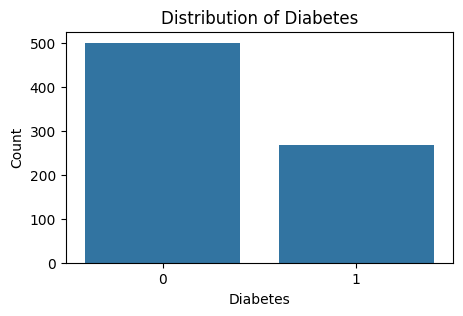

In [239]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Outcome', data=diabetes)
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Distribution of Diabetes')
plt.show()

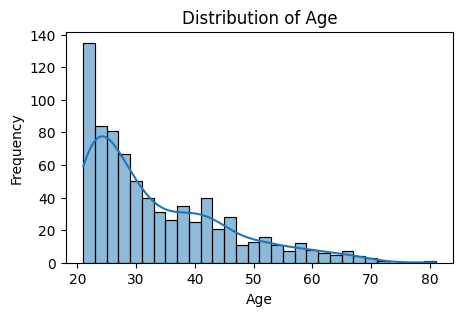

In [240]:
plt.figure(figsize=(5, 3))
sns.histplot(diabetes["Age"], bins=30, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

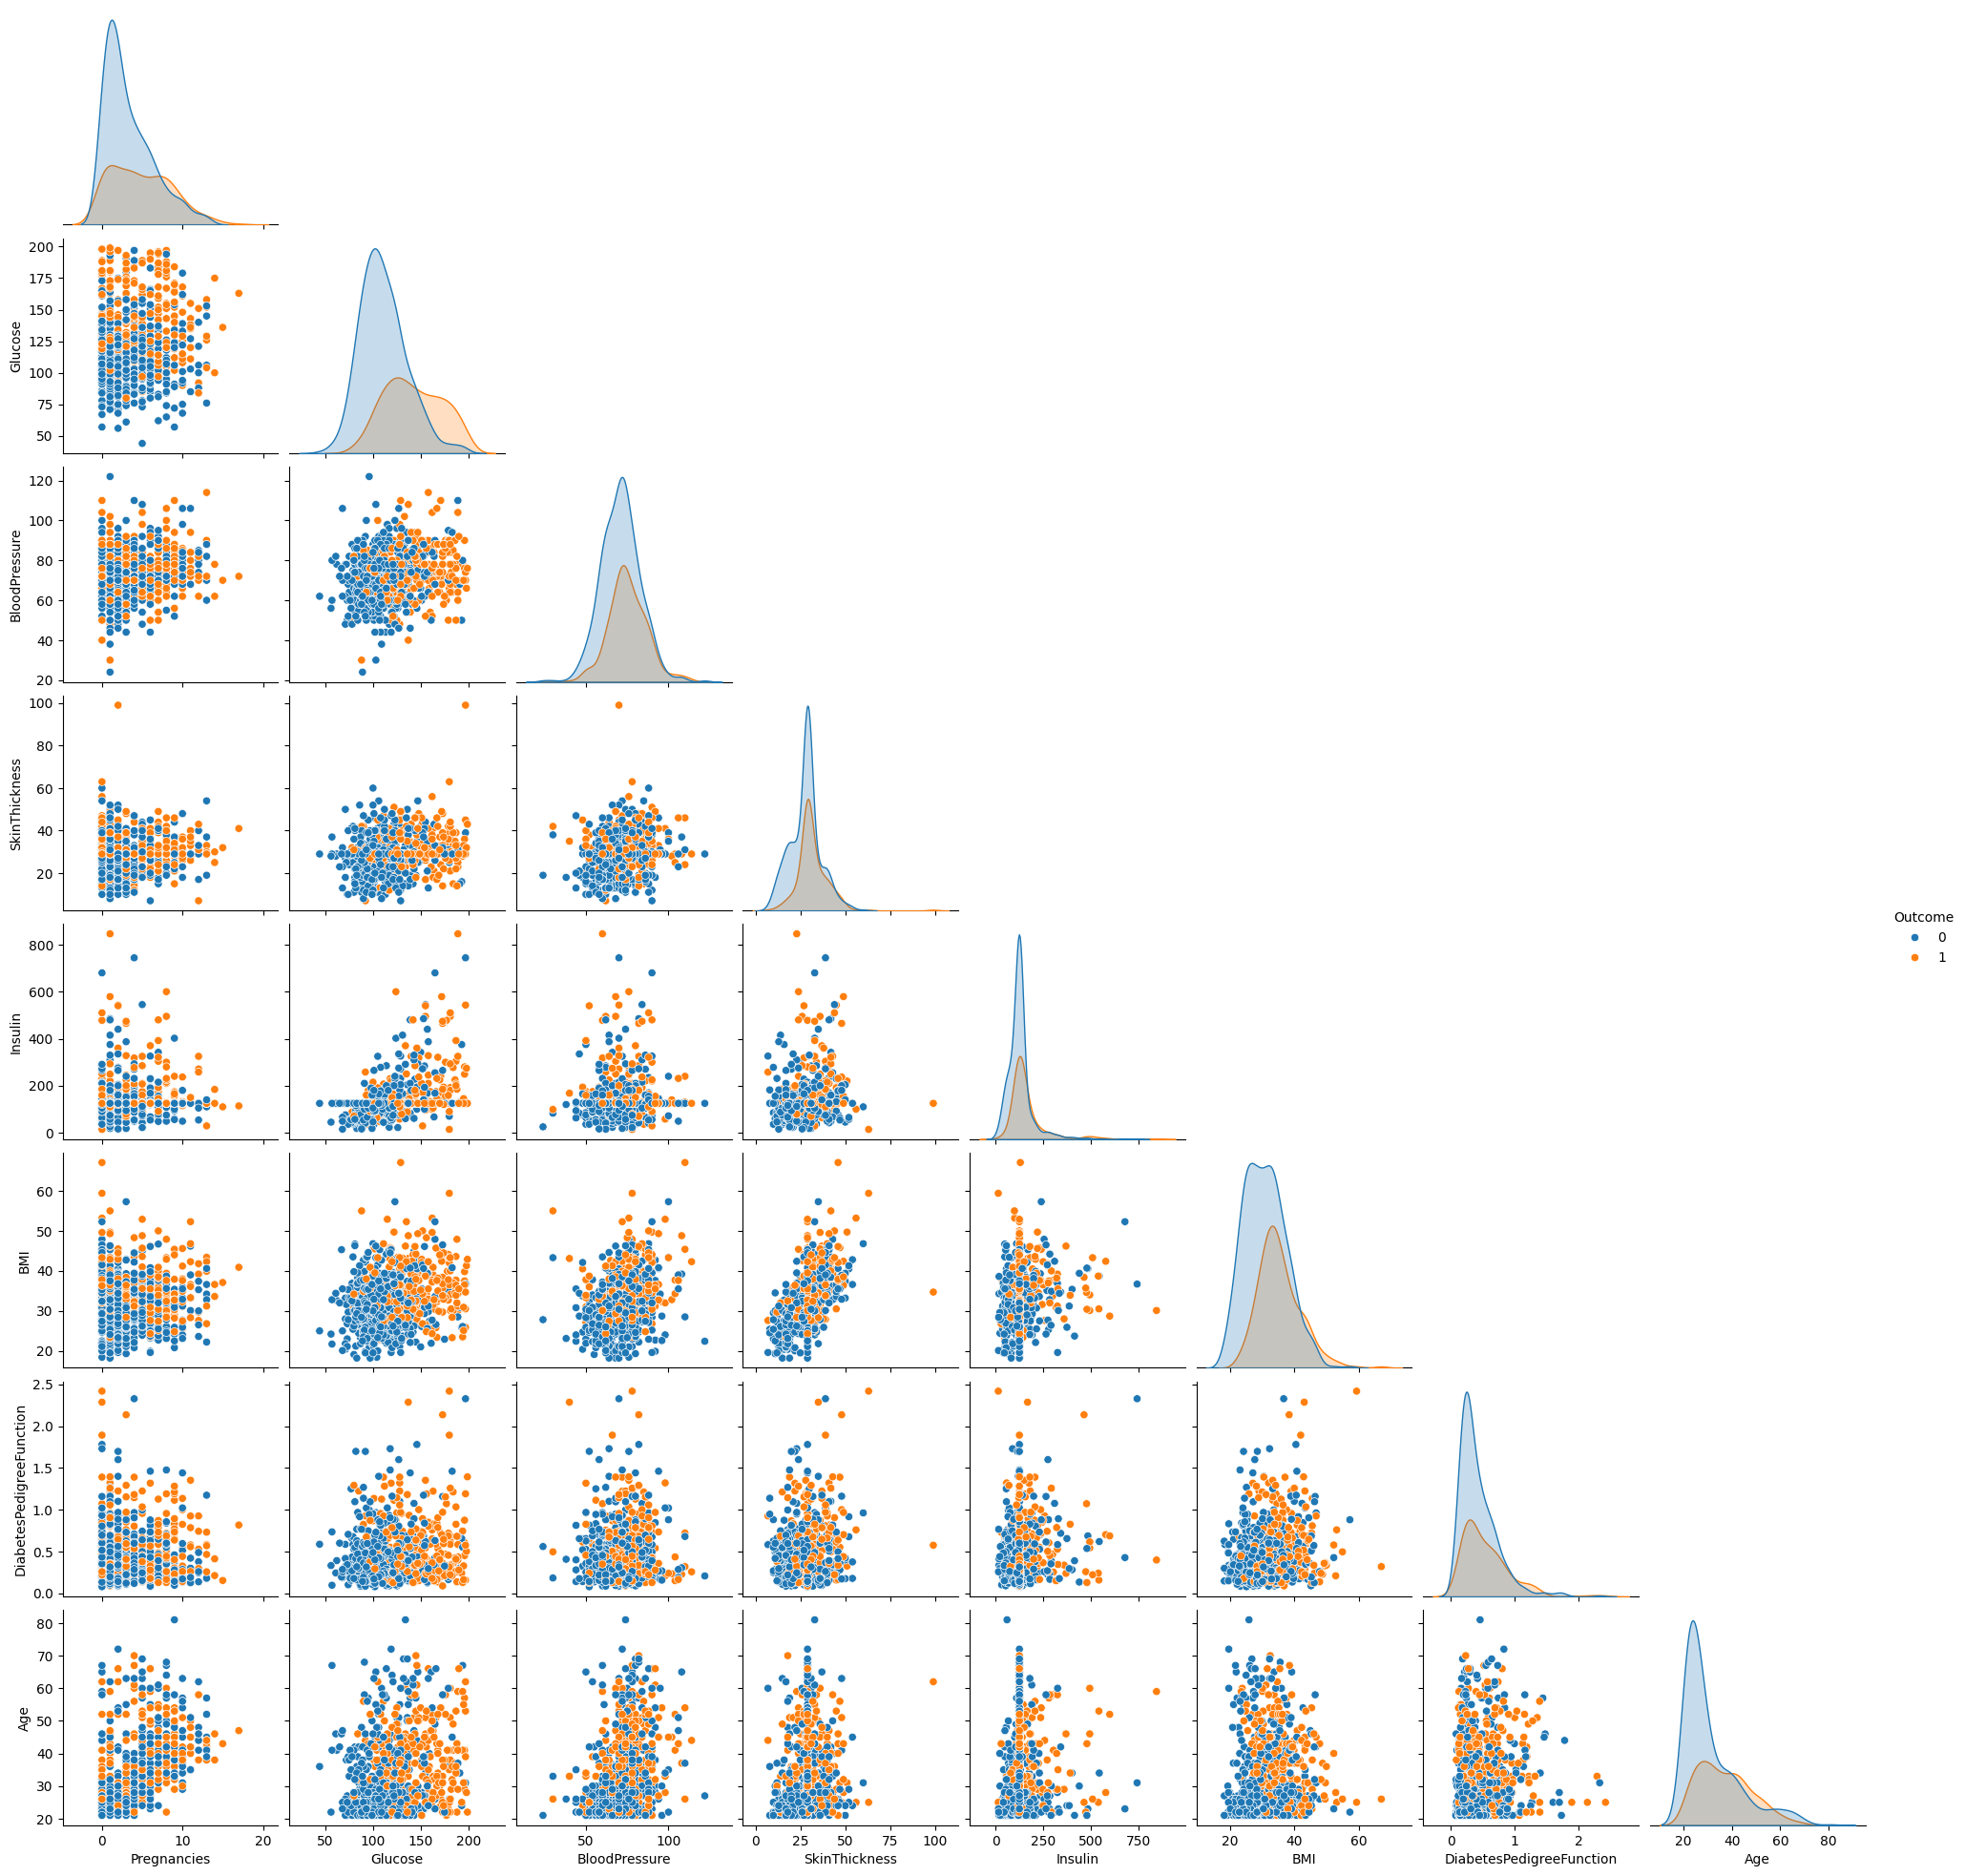

In [48]:
sns.pairplot(diabetes, hue = 'Outcome', vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], corner=True)

- Glucose and BMI appear to be strongly associated with diabetes, as diabetic individuals (orange) tend to have higher glucose and BMI values.
- Insulin and SkinThickness show a wide spread of values, indicating possible inconsistencies or missing data handling issues.
- There is no clear linear separation between diabetic and non-diabetic individuals in most feature pairs, suggesting that a non-linear model (decision trees, neural networks etc.) might perform better for classification.

## Training Preparation

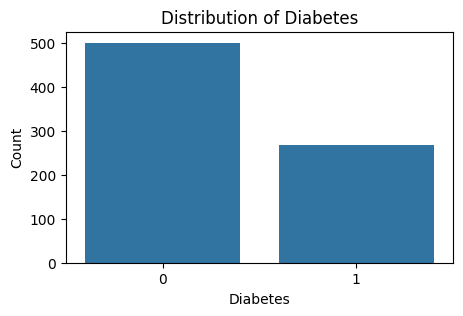

- As shown in the figure, Outcome (diabetes yes/no) classes are unbalanced and by adding stratify=y we can achieve a balanced distribution in both groups.

In [241]:
from sklearn.model_selection import train_test_split

X = diabetes.drop(columns=["Outcome"])
y = diabetes["Outcome"]

- Since each feature has different numerical ranges, we need to scale them.

In [242]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (614, 8)
Test set size: (154, 8)


## Method 1: Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_LR = LogisticRegression()

model_LR.fit(X_train, y_train)

LogisticRegression()

In [55]:
# predict the score of the trained model using the testing dataset

result_test = model_LR.score(X_test, y_test)
print("Accuracy : {}".format(result_test))

# make predictions on the test data
y_predict = model_LR.predict(X_test)

Accuracy : 0.7012987012987013


### Model Performance

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.59      0.50      0.54        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



Text(0.5, 23.52222222222222, 'Actual class')

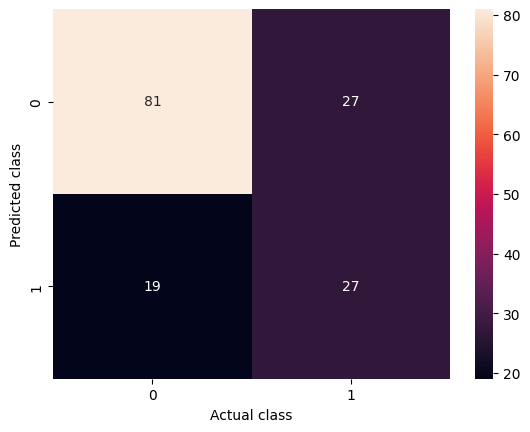

In [56]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_predict))

cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot = True)
plt.ylabel('Predicted class')
plt.xlabel('Actual class')

### Class-Based Performance
- Class 0 (No Diabetes)
	- Precision: 0.75 → The model’s negative predictions are generally accurate.
	- Recall: 0.81 → Most of the actual negatives are correctly identified.
	- F1-score: 0.78 → Shows a balanced performance.

- Class 1 (Diabetes Present)
	- Precision: 0.59 → 59% of positive predictions are correct.
	- Recall: 0.50 → The model correctly identifies only 50% of actual diabetes cases.
	- F1-score: 0.54 → Weak in detecting diabetic individuals.

Summary:

The model (Linear Regression) performs better in predicting non-diabetic individuals, while it tends to miss diabetic cases (Class 1). The low recall indicates that the model fails to sufficiently capture diabetes cases.

## Method 2: Neural Network Model (ANN) Using Keras

In [349]:
model_ANN = tf.keras.models.Sequential([

    tf.keras.layers.Input(shape = (8, )),

    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),

    tf.keras.layers.Dense(1, activation='sigmoid')
    ])


model_ANN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [350]:
history = model_ANN.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.5208 - loss: 0.6987 - val_accuracy: 0.7480 - val_loss: 0.5797
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7298 - loss: 0.5696 - val_accuracy: 0.7724 - val_loss: 0.4945
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7326 - loss: 0.5122 - val_accuracy: 0.7886 - val_loss: 0.4418
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7712 - loss: 0.4740 - val_accuracy: 0.7886 - val_loss: 0.4318
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7858 - loss: 0.4518 - val_accuracy: 0.8049 - val_loss: 0.4179
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7942 - loss: 0.4340 - val_accuracy: 0.8130 - val_loss: 0.4179
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7943 - loss: 0.4422 - val_accuracy: 0.8211 - val_loss: 0.4119
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8302 - loss: 0.3856 - val_accuracy: 0.7967 -

In [359]:
y_pred = model_ANN.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


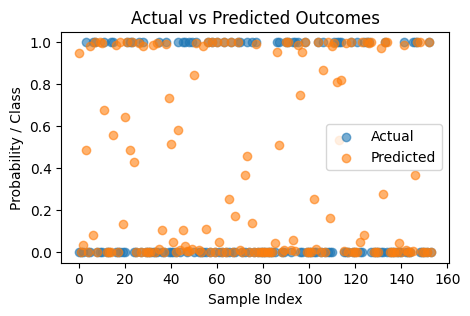

In [360]:
plt.figure(figsize=(5, 3))
plt.scatter(range(len(y_test)), y_test, label="Actual", alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, label="Predicted", alpha=0.6)
plt.xlabel("Sample Index")
plt.ylabel("Probability / Class")
plt.title("Actual vs Predicted Outcomes")
plt.legend()
plt.show()

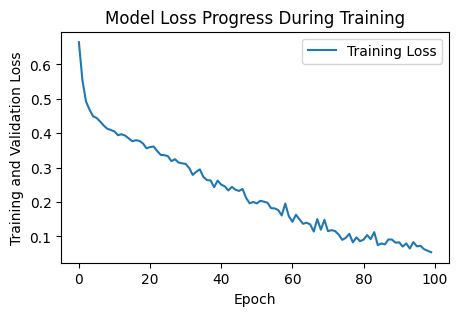

In [361]:
# Loss Plot
plt.figure(figsize=(5, 3))
plt.plot(history.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss'])

In [363]:
y_pred = (y_pred > 0.5) #threshold

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       100
           1       0.61      0.67      0.64        54

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.74       154



Text(0.5, 23.52222222222222, 'Actual class')

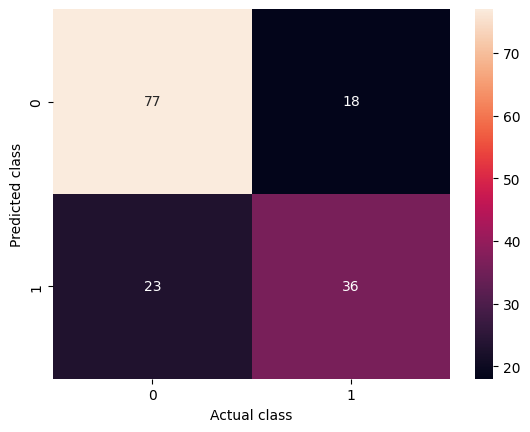

In [364]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)
plt.ylabel('Predicted class')
plt.xlabel('Actual class')

Class-Based Performance

- Class 0 (No Diabetes)
	- Precision: 0.81 → The model’s negative predictions are generally accurate.
	- Recall: 0.77 → Most of the actual negatives are correctly identified.
	- F1-score: 0.79 → Shows a balanced performance.

- Class 1 (Diabetes Present)
	- Precision: 0.61 → 61% of positive predictions are correct.
	- Recall: 0.67 → The model correctly identifies only 67% of actual diabetes cases.
	- F1-score: 0.64 → Weak in detecting diabetic individuals.

Summary:

The model performs better in predicting non-diabetic individuals, while it tends to miss diabetic cases (Class 1). The low recall indicates that the model fails to sufficiently capture diabetes cases.

## Method 3: XG-BOOST Classifier

In [244]:
import xgboost as xgb

In [245]:
model_XGB = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 10)
model_XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [246]:
result_train = model_XGB.score(X_train, y_train)
print("Accuracy : {}".format(result_train))

Accuracy : 0.8501628664495114


In [247]:
result_test = model_XGB.score(X_test, y_test)
print("Accuracy : {}".format(result_test))

Accuracy : 0.7532467532467533


In [249]:
y_predict = model_XGB.predict(X_test)

In [250]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       100
           1       0.70      0.52      0.60        54

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



Text(0.5, 23.52222222222222, 'Actual class')

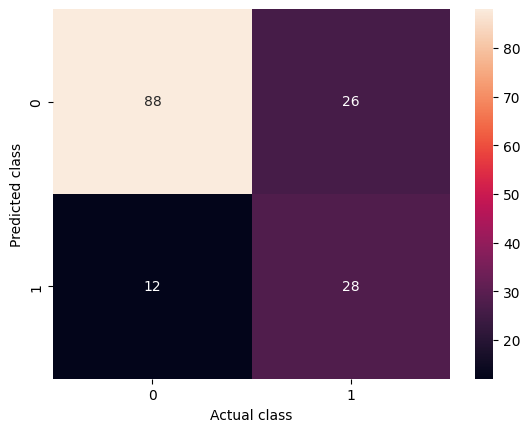

In [251]:
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot = True)
plt.ylabel('Predicted class')
plt.xlabel('Actual class')

Class-Based Performance

- Class 0 (No Diabetes)
	- Precision: 0.77 → The model’s negative predictions are generally accurate.
	- Recall: 0.88 → Most of the actual negatives are correctly identified.
	- F1-score: 0.82 → Shows a balanced performance.

- Class 1 (Diabetes Present)
	- Precision: 0.70 → 70% of positive predictions are correct.
	- Recall: 0.52 → The model correctly identifies only 52% of actual diabetes cases.
	- F1-score: 0.60 → Weak in detecting diabetic individuals.

Summary:

The model performs better in predicting non-diabetic individuals, while it tends to miss diabetic cases (Class 1). The low recall indicates that the model fails to sufficiently capture diabetes cases.

## Evaluation of Models and Conclusion

Three models

- `Logistic Regression`
- `Neural Networks`
- `XGBoost`

were evaluated based on `precision`, `recall`, and `F1-score` for both class 0 (No Diabetes) and class 1 (Diabetes Present).

### Results:

### Logistic Regression

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.59      0.50      0.54        54

    accuracy                           0.70       154


- Observations:
	- Performs relatively well in predicting non-diabetic cases but struggles with recall for class 1.
	- The low recall (0.50) for class 1 means that many diabetes cases are being misclassified as non-diabetic.



---



### Neural Networks

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       100
           1       0.61      0.67      0.64        54

    accuracy                           0.73       154

- Observations:
	- Shows improved performance for class 1 compared to Logistic Regression, with a higher recall (0.67).
	- Still underperforms in correctly predicting diabetic cases, but achieves a more balanced performance.

---

### XG-BOOST

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       100
           1       0.70      0.52      0.60        54

    accuracy                           0.75       154

- Observations:
	- XGBoost achieves the highest overall accuracy (75%) and the highest precision for class 1 (0.70).
	- However, recall for class 1 (0.52) is lower than Neural Networks, indicating that many diabetic cases are still being misclassified.



---

### Conclucion

- XGBoost outperforms the other models in terms of overall accuracy and precision but has a lower recall for class 1.
- Neural Networks achieve a more balanced performance between precision and recall, making them a reasonable choice if correctly identifying diabetes cases is a priority.
- Logistic Regression has the lowest accuracy and recall for class 1, making it the least effective option for this classification problem.

### Recommendation:

- If the priority is overall accuracy, XGBoost is the best model.
- If the priority is identifying more diabetic cases (higher recall for class 1), Neural Networks may be preferable.
- Further improvements could be made by adjusting decision thresholds, handling class imbalance (e.g., oversampling class 1), or using ensemble methods combining multiple models.